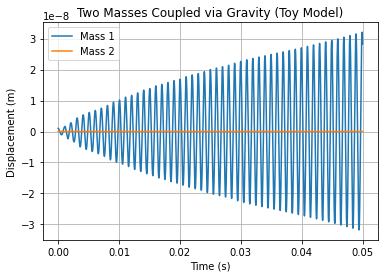

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1e-12          # mass in kg
omega = 2*np.pi*1e3
G = 6.674e-11       # gravitational constant
d = 1e-4            # separation between masses (100 microns)

# Gravitational coupling coefficient
k_g = G * m**2 / d**3

# Trap stiffness
k = m * omega**2

# Equations of motion

def coupled_system(t, y):
    x1, v1, x2, v2 = y
    dx1 = v1
    dv1 = -(k*x1 + k_g * x2) / m
    dx2 = v2
    dv2 = -(k*x2 + k_g * x1) / m
    return [dx1, dv1, dx2, dv2]

# Initial conditions
y0 = [1e-9, 0, 0, 0]  # displace only mass 1

t = np.linspace(0, 0.05, 50000)
sol = solve_ivp(coupled_system, (t[0], t[-1]), y0, t_eval=t)

# Plot
plt.plot(t, sol.y[0], label="Mass 1")
plt.plot(t, sol.y[2], label="Mass 2")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Two Masses Coupled via Gravity (Toy Model)")
plt.legend()
plt.grid(True)
plt.show()
